In [1]:
import re
import os
import arrow
import nltk
import pandas as pd
import altair as alt
from IPython.display import display, HTML, FileLink, clear_output
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')

[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


DataTransformerRegistry.enable('json')

In [2]:
def make_word_sets(df, words=[], position=None, distance=None):
    dfs = []
    if position and distance:
        if position == 'before':
            distance = 0 - distance
        elif position == 'after':
            distance = distance - 1
    if words:
        for word in words:
            if position and distance:
                new_df = df.loc[df[position].apply(lambda x: x[distance] == word)].copy()
            elif position:
                new_df = df.loc[df[position].apply(lambda x: word in x)].copy()
            elif distance:
                new_df = df.loc[df['before'].apply(lambda x: x[0 - distance] == word) | df['after'].apply(lambda x: x[distance - 1] == word)].copy()
            else:
                new_df = df.loc[df['before'].apply(lambda x: word in x) | df['after'].apply(lambda x: word in x)].copy()
            new_df['word'] = word
            dfs.append(new_df[['date', 'id', 'word', 'kwic']])
    elif position and distance:
        new_df = df.copy()
        new_df['word']= new_df.apply(lambda row: row[position][distance], axis=1)
        dfs.append(new_df[['date', 'id', 'word', 'kwic']])
    return pd.concat(dfs, ignore_index=True)

## Load data

In [3]:
# Load aliens data
aliens_df = pd.read_csv('bulletin-aliens-words-5.csv', parse_dates=['date'])
aliens_df['before'] = aliens_df['before'].str.lower().str.split('|')
aliens_df['after'] = aliens_df['after'].str.lower().str.split('|')
aliens_df.dropna(inplace=True)
aliens_df.head()

,id,date,kwic,before,after
0,nla.obj-125586911,1880-06-05,y another of the children. A correspondent of ...,"[children, a, correspondent, of, the]","[condemns, the, juve, nile, pinafore]"
1,nla.obj-127626657,1880-11-06,"cause I believe these people to nists, and, be...","[people, to, nists, and, being]","[in, blood, a, class, of]"
2,nla.obj-132948968,1881-05-07,r than be reduced to misery by the competition...,"[misery, by, the, competition, of]","[repugnant, alike, in, person, in]"
3,nla.obj-211155352,1882-05-20,A number of Circassian officers —mercenaries ...,"[of, circassian, officers, mercenaries, and]","[were, tried, and, convicted, for]"
4,nla.obj-211155352,1882-05-20,ity. But it is too deductive not to be seducti...,"[deductive, not, to, be, seductive]","[m, ezra, lazareck, mr, j]"


In [4]:
# Load immigrants data
immigrants_df = pd.read_csv('bulletin-immigrants-words-5.csv', parse_dates=['date'])
immigrants_df['before'] = immigrants_df['before'].str.lower().str.split('|')
immigrants_df['after'] = immigrants_df['after'].str.lower().str.split('|')
immigrants_df.dropna(inplace=True)
immigrants_df.head()

,id,date,kwic,before,after
0,nla.obj-188284455,1880-02-07,loads of penni- less and often far from energe...,"[and, often, far, from, energetic]","[means, nothing, but, a, large]"
1,nla.obj-188284455,1880-02-07,"l Dalhousie, just arrived at Brisbane, brings ...","[arrived, at, brisbane, brings, 314]","[from, london, tne, last, escort]"
2,nla.obj-125534622,1880-03-06,y Boyd. The Norval has arrived at Sydney with ...,"[arrived, at, sydney, with, 366]","[a, few, of, whom, are]"
3,nla.obj-201374109,1880-05-22,Friday was well attended by the elite. The Cl...,"[by, the, elite, the, clyde]","[numbering, 390, arc, healthy, and]"
4,nla.obj-201374109,1880-05-22,"mprehensive and valuable. 7""All the single fem...","[7, all, the, single, female]","[per, clyde, were, engaged, within]"


## Overall frequencies

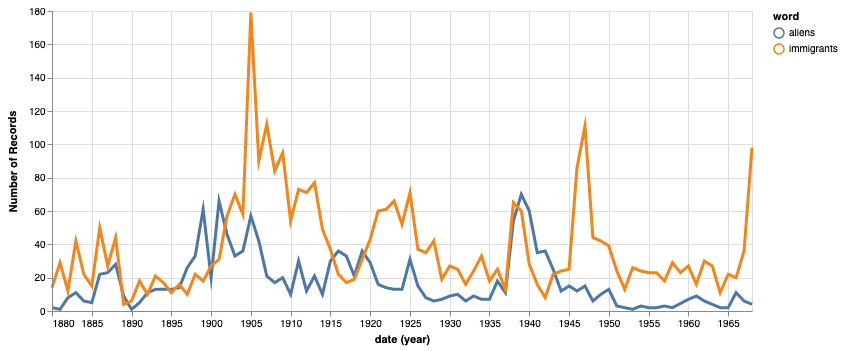

In [5]:
c1 = alt.Chart(aliens_df).mark_line(strokeWidth=3).encode(
    x='year(date):T',
    y='count():Q',
    color='word:N'
).transform_calculate(
    word = '"aliens"'
).properties(
    width=700
)

c2 = alt.Chart(immigrants_df).mark_line(strokeWidth=3).encode(
    x='year(date):T',
    y='count():Q',
    color='word:N'
).transform_calculate(
    word = '"immigrants"'
).properties(
    width=700
)

c1 + c2

## Words before

In [6]:
words_before_aliens = make_word_sets(df=aliens_df, position='before', distance=1)
words_before_aliens = words_before_aliens.loc[words_before_aliens['word'].apply(lambda x: (x.lower() not in stopwords) and len(x) > 2)]
words_before_immigrants = make_word_sets(df=immigrants_df, position='before', distance=1)
words_before_immigrants = words_before_immigrants.loc[words_before_immigrants['word'].apply(lambda x: (x.lower() not in stopwords) and len(x) > 2)]

In [7]:
words_before_aliens['word'].value_counts()[:25]

enemy            81
colored          79
undesirable      28
yellow           10
exclude           9
unnaturalised     9
communi           8
resident          8
many              8
cheap             8
000               7
white             6
expel             6
asiatic           6
friendly          6
new               5
two               5
discolored        5
pro               5
naturalised       5
present           4
refugee           4
european          4
brown             3
give              3
Name: word, dtype: int64

In [8]:
words_before_immigrants['word'].value_counts()[:25]

british         92
000             69
desirable       57
assisted        56
jewish          52
undesirable     51
prohibited      43
white           40
european        38
colored         37
new             36
free            36
italian         33
chinese         31
irish           27
english         26
agricultural    23
attract         22
german          22
best            20
illegal         19
female          17
many            17
thousand        13
alien           13
Name: word, dtype: int64

In [9]:
alien_words = make_word_sets(df=aliens_df, words=['enemy', 'undesirable', 'yellow', 'colored', 'resident', 'cheap'], position='before', distance=1)

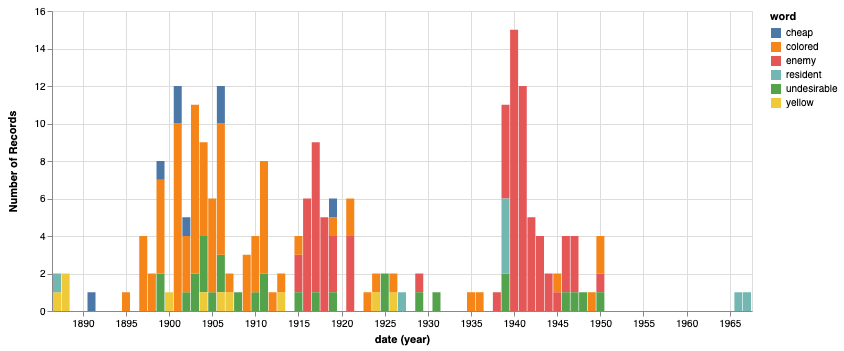

In [10]:
c3 = alt.Chart(alien_words).mark_bar(size=8).encode(
    x='year(date):T',
    y=alt.Y('count():Q'),
    color='word'
).properties(
    width=700
)
c3

In [11]:
immigrant_words = make_word_sets(df=immigrants_df, words=['desirable', 'assisted', 'undesirable', 'prohibited', 'white', 'colored', 'free'], position='before')

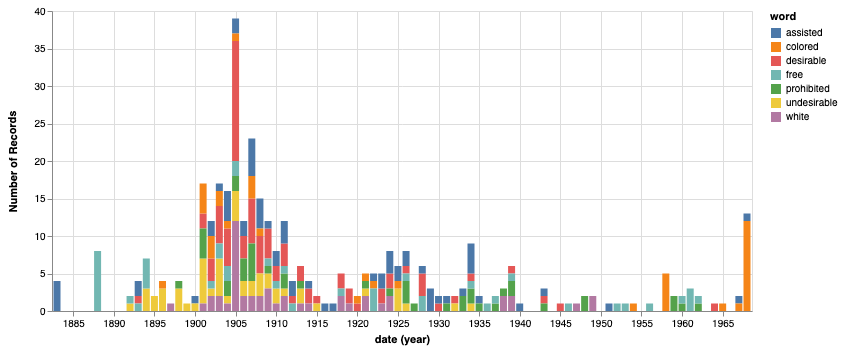

In [12]:
c4 = alt.Chart(immigrant_words).mark_bar(size=7).encode(
    x='year(date):T',
    y=alt.Y('count():Q'),
    color='word'
).properties(width=700)

c4

In [13]:
immigrant_origin_words = make_word_sets(df=immigrants_df, words=['british', 'jewish', 'european', 'italian', 'chinese', 'irish', 'english', 'german', 'japanese', 'scottish', 'scotch', 'dutch', 'asian', 'american', 'indian', 'asiatic'], position='before', distance=1)

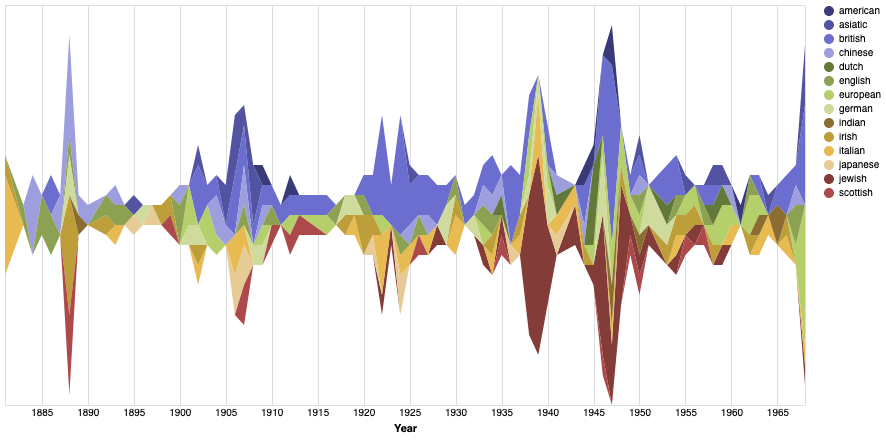

In [14]:
alt.Chart(immigrant_origin_words.replace('scotch', 'scottish').replace('asian', 'asiatic')).mark_area().encode(
    alt.X('year(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0), title='Year'
    ),
    alt.Y('count():Q', stack='center', axis=None, title='Frequency'),
    alt.Color('word:N', scale=alt.Scale(scheme='category20b'), title=None)
).properties(width=800, height=400)